In [1]:
import os
import warnings
import pandas as pd
import numpy as np
from datetime import datetime

import numpy as np
import pywt
import time
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Specify the directory path
folder_dir = 'SWAN-SF dataset/partition1/FL'

# List all files in the specified directory
files = os.listdir(folder_dir)

# Print the number of files in the directory
print(len(files))

1254


In [3]:
# Initialize empty DataFrames and counters
df_M = pd.DataFrame()
df_X = pd.DataFrame()
m_count = 0
x_count = 0

# Lists to store DataFrames for 'M' and 'X' files
df_M_list = []
df_X_list = []

# Iterate through files, read CSV, and categorize into 'M' or 'X'
for file in files:
    df_tmp = pd.read_csv(folder_dir + "/" + file, sep='\\t')
    if file[0] == 'M':
        m_count += 1
        df_M_list.append(df_tmp)
    elif file[0] == 'X':
        x_count += 1
        df_X_list.append(df_tmp)

# Concatenate DataFrames, reset index, and add labels
df_M = pd.concat(df_M_list, axis=0).reset_index(drop=True)
df_M['label'] = ['M'] * len(df_M)
df_X = pd.concat(df_X_list, axis=0).reset_index(drop=True)
df_X['label'] = ['X'] * len(df_X)

# Concatenate 'M' and 'X' DataFrames into a single DataFrame
df_all = pd.concat([df_M, df_X], axis=0).reset_index(drop=True)

# Print shapes and display the head of the combined DataFrame
print(df_M.shape)
print(df_X.shape)
print(df_all.shape)
df_all.head()


(65340, 56)
(9900, 56)
(75240, 56)


,Timestamp,TOTUSJH,TOTBSQ,TOTPOT,TOTUSJZ,ABSNJZH,SAVNCPP,USFLUX,TOTFZ,MEANPOT,...,CFLARE_LOC,CFLARE_LABEL_LOC,MFLARE_LOC,MFLARE_LABEL_LOC,XFLARE_LOC,XFLARE_LABEL_LOC,XR_MAX,XR_QUAL,IS_TMFI,label
0,2010-08-07 03:36:00,909.052634,1.430526e+10,2.314318e+23,1.883244e+13,130.069909,1.020244e+12,1.537751e+22,-5.431882e+24,6980.096952,...,0.0,NaN,0.0,NaN,0.0,NaN,2.131800e-07,12,True,M
1,2010-08-07 03:48:00,910.737606,1.423815e+10,2.311862e+23,1.878021e+13,132.612357,9.380776e+11,1.510024e+22,-5.350299e+24,7181.228360,...,0.0,NaN,0.0,NaN,0.0,NaN,2.043800e-07,12,True,M
2,2010-08-07 04:00:00,915.064861,1.422822e+10,2.338073e+23,1.883928e+13,116.336336,9.825944e+11,1.502843e+22,-5.219326e+24,7256.359920,...,0.0,NaN,0.0,NaN,0.0,NaN,1.743900e-07,12,True,M
3,2010-08-07 04:12:00,916.337624,1.409452e+10,2.319028e+23,1.852889e+13,128.939124,8.336806e+11,1.466850e+22,-5.143741e+24,7506.330704,...,0.0,NaN,0.0,NaN,0.0,NaN,1.481700e-07,12,True,M
4,2010-08-07 04:24:00,916.419818,1.398904e+10,2.311742e+23,1.859573e+13,133.114503,1.408764e+12,1.448651e+22,-5.028688e+24,7529.677581,...,0.0,NaN,0.0,NaN,0.0,NaN,1.434200e-07,12,True,M


Total sample in M = 1089 <br>
Total sample in X = 165

# Checking Running Time for M (lossless decomposition)

In [17]:
import matplotlib.pyplot as plt

# Extract information for plotting Class M
n_times_M = len(df_M)
time_M = range(n_times_M)
signal_M = df_M['TOTUSJH']

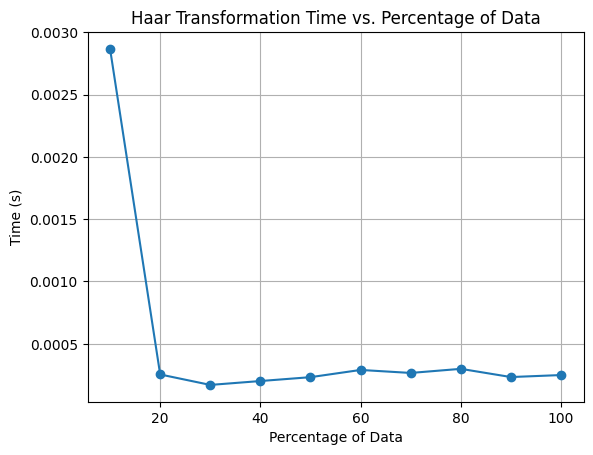

In [25]:

def perform_haar_transformation(signal, percent_data):
    # Calculate the number of data points to keep based on the given percentage
    num_points_to_keep = int(n_times_M * percent_data)
    
    # Apply Haar wavelet transformation
    coeffs = pywt.wavedec(signal[:num_points_to_keep], 'haar', level=3)
    
    return coeffs, int(1089 * percent_data)


# Define the percentage values for data points to keep
percentage_values = np.arange(0.1, 1.1, 0.1)
x_axis_vals = []

# Lists to store results
time_taken_list = []

# Perform Haar transformation for different percentages and measure time
for percent_data in percentage_values:
    start_time = time.time()
    coeffs, tmp_samples = perform_haar_transformation(signal_M, percent_data)
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    x_axis_vals.append(str(int(percent_data*100))+"\n"+str(tmp_samples))

# Plotting the results
plt.plot(percentage_values*100, time_taken_list, marker='o')
plt.title('Haar Transformation Time vs. Percentage of Data')
plt.xlabel('Percentage of Data')
plt.ylabel('Time (s)')
plt.grid(True)
plt.show()

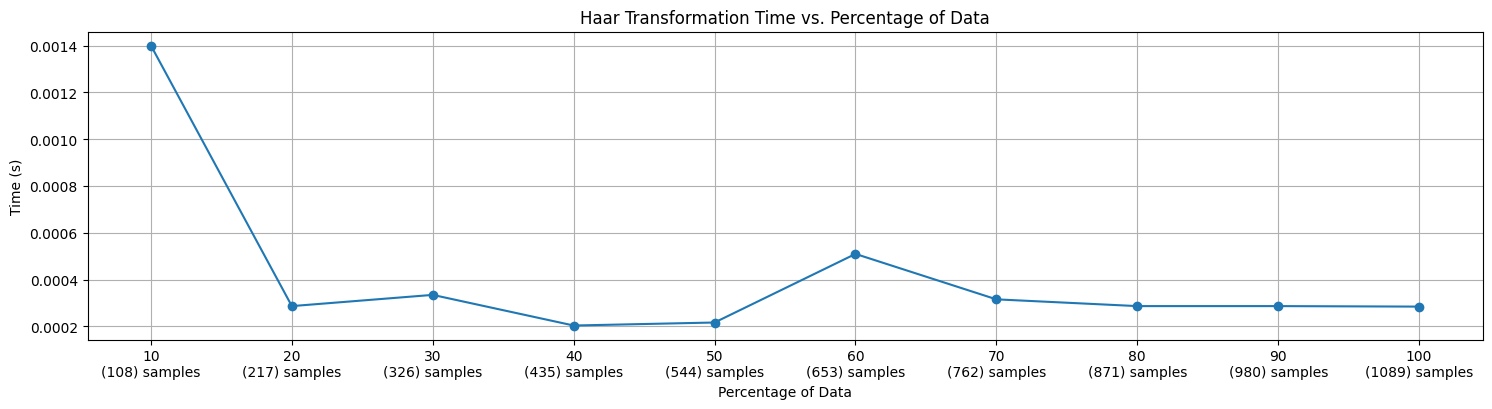

In [19]:
def perform_haar_transformation(signal, num_points_to_keep):
    # Calculate the number of data points to keep based on the given percentage
    
    # Apply Haar wavelet transformation
    coeffs = pywt.wavedec(signal[:num_points_to_keep], 'haar', level=3)
    
    return coeffs


# Define the percentage values for data points to keep
percentage_values = np.arange(0.1, 1.1, 0.1)
x_axis_vals = []

# Lists to store results
time_taken_list = []

# Perform Haar transformation for different percentages and measure time
for percent_data in percentage_values:
    num_points_to_keep = int(1089 * percent_data)*60
    start_time = time.time()
    coeffs = perform_haar_transformation(signal_M, num_points_to_keep)
    time_taken = time.time() - start_time
    time_taken_list.append(time_taken)

    x_axis_vals.append(str(int(percent_data*100))+"\n"+"("+str(int(1089 * percent_data))+") samples")

# Plotting the results
plt.figure(figsize=(18,4))
plt.plot(x_axis_vals, time_taken_list, marker='o')
plt.title('Haar Transformation Time vs. Percentage of Data')
plt.xlabel('Percentage of Data')
plt.ylabel('Time (s)')
plt.grid(True)
plt.show()

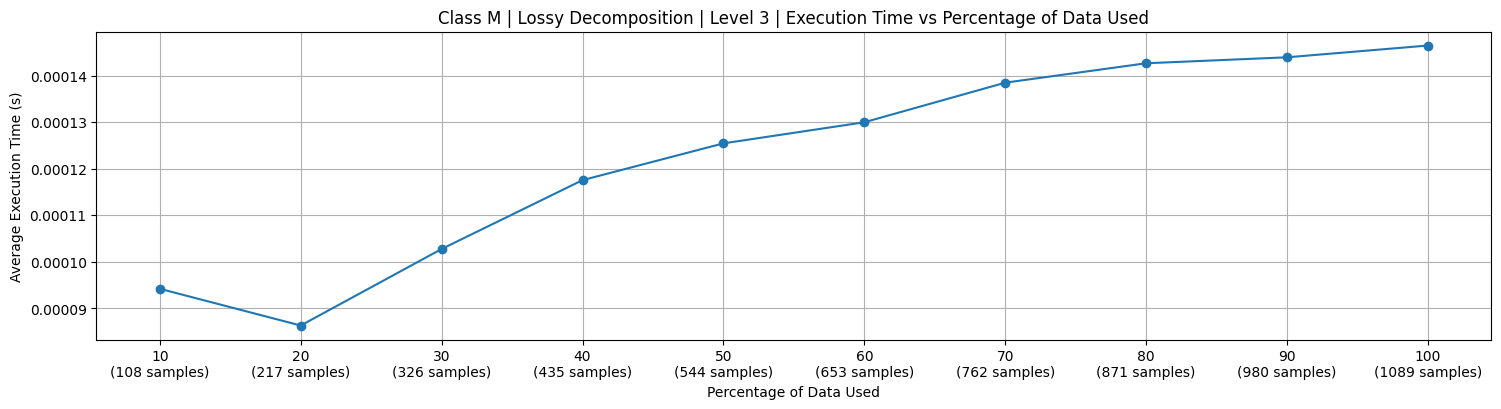

In [23]:
# Define the percentages of data to use
percentage_values = np.arange(0.1, 1.1, 0.1)

# Initialize an array to store execution times
avg_times = []
x_axis_vals = []

for percent in percentage_values:
    # Calculate the number of data points to use
    num_points_to_keep = int(1089 * percent)*60

    # Extract the required portion of the signal
    partial_signal = signal_M[:num_points_to_keep]

    # Run the transformation multiple times and measure time
    num_iterations = 50
    total_time = 0

    for _ in range(num_iterations):
        start_time = time.time()

        # Perform Haar wavelet transform
        _ = pywt.wavedec(partial_signal, 'haar', level=3)

        end_time = time.time()
        total_time += end_time - start_time

    # Calculate average time for this percentage
    avg_execution_time = total_time / num_iterations
    avg_times.append(avg_execution_time)

    x_axis_vals.append(str(int(percent*100))+"\n"+"("+str(int(1089 * percent))+" samples)")


# Plot the results
plt.figure(figsize=(18,4))
plt.plot(x_axis_vals, avg_times, marker='o')
plt.xlabel('Percentage of Data Used')
plt.ylabel('Average Execution Time (s)')
plt.title('Class M | Lossy Decomposition | Level 3 | Execution Time vs Percentage of Data Used')
plt.grid(True)
plt.show()


# Checking Running Time for X (lossless decomposition)

In [24]:
import matplotlib.pyplot as plt

# Extract information for plotting Class M
n_times_X = len(df_X)
time_X = range(n_times_X)
signal_X = df_X['TOTUSJH']

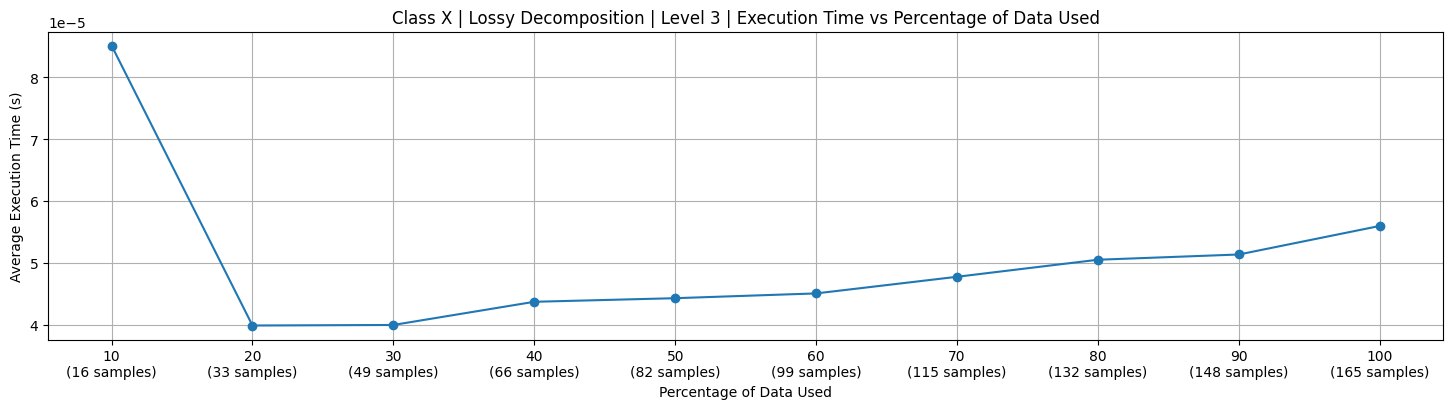

In [30]:
# Define the percentages of data to use
percentage_values = np.arange(0.1, 1.1, 0.1)

# Initialize an array to store execution times
avg_times = []
x_axis_vals = []

for percent in percentage_values:
    # Calculate the number of data points to use
    num_points_to_keep = int(165 * percent)*60

    # Extract the required portion of the signal
    partial_signal = signal_X[:num_points_to_keep]

    # Run the transformation multiple times and measure time
    num_iterations = 50
    total_time = 0

    for _ in range(num_iterations):
        start_time = time.time()

        # Perform Haar wavelet transform
        _ = pywt.wavedec(partial_signal, 'haar', level=3)

        end_time = time.time()
        total_time += end_time - start_time

    # Calculate average time for this percentage
    avg_execution_time = total_time / num_iterations
    avg_times.append(avg_execution_time)

    x_axis_vals.append(str(int(percent*100))+"\n"+"("+str(int(165 * percent))+" samples)")


# Plot the results
plt.figure(figsize=(18,4))
plt.plot(x_axis_vals, avg_times, marker='o')
plt.xlabel('Percentage of Data Used')
plt.ylabel('Average Execution Time (s)')
plt.title('Class X | Lossy Decomposition | Level 3 | Execution Time vs Percentage of Data Used')
plt.grid(True)
plt.show()
